# Day 10: Monitoring Station

In [1]:
import scipy.sparse as sparse
import numpy as np
from copy import copy,deepcopy
import math
import os

In [78]:
class Point:
    def __init__(self,i=None,j=None,coord=None):
        if i is not None:
            self.i = i
            self.j = j
        else:
            self.i = coord[0]
            self.j = coord[1]

    def __str__(self):
        return f"Point({self.i},{self.j})"
    
    def __repr__(self):
        return f"Point({self.i},{self.j})"
    
    def __mul__(self,int_):
        return Point(i=self.i*int_,j=self.j*int_)
    
    def __add__(self,point):
        return Point(i=self.i+point.i,j=self.j+point.j)
    
    def __eq__(self,point):
        return self.i==point.i and self.j==point.j

    def vector(self,other_point,normalize=False):
        try:
            coord=(other_point.i-self.i,other_point.j-self.j)
            if normalize:
                norm = math.gcd(coord[0],coord[1])
                coord = (int(coord[0]/norm),int(coord[1]/norm))
        except ValueError:
            raise("ValueError: The two points have the same coord!",self)
            
        return Point(coord=coord)
    
    def manhattanDistance(self,other_point):
        return abs(self.j-other_point.j)+abs(self.i-other_point.i)

class Map:
    def __init__(self,file=None,data=None):
        
        if file is not None:
            with open(filename) as f:
                data = f.read().split("\n")
                if len(data[-1])==0:
                    print("Delete last empty row")
                    data= data[:-1]
                
        self.map = []
        for line in data:
            self.map.append([1 if char=="#" else 0 for char in line ])
        self.map=np.array(self.map)
        
        self.satellites_coord = [Point(coord=coord) for coord in np.argwhere(self.map==1)]
        self.size = self.map.shape
        
    def __str__(self):
        return str(self.map)
    
    def __repr__(self):
        return str(self.map)

    def bestStation(self):
        max_seen=0
        best_station=None
        for i,station in enumerate(self.satellites_coord):
            hidden_set = set()
            for j,ast in enumerate(self.satellites_coord):
                if i==j:
                    continue
                    
                direction=station.vector(ast,normalize=True)
                cur_point = ast+ direction

                while cur_point.i<self.size[0]  and cur_point.j<self.size[1] and cur_point.i>=0  and cur_point.j>=0:
                    hidden,idx=self.checkHidden(cur_point)
                    if hidden:
                        hidden_set.add(idx)
                    cur_point+=direction

            visible = len(self.satellites_coord)-len(hidden_set)-1
            if visible>max_seen:
                max_seen=visible
                best_station=(i,station)
        
        self.station=best_station[1]
        self.station_idx=best_station[0]
        self.map[self.station.i,self.station.j]=2
        print(f"Max: Best station at coordinates {best_station[1]} with {max_seen} visible asteroids")
        
    
    def checkHidden(self,coord):
        for idx,point in enumerate(self.satellites_coord):
            if coord==point:
                return True,idx
        return False,None  


In [170]:
# filename = os.path.join(os.getcwd(),"d10_input")
filename = os.path.join(os.getcwd(),"d10_t1")
map_=Map(filename)
map_=Map(data=[".#..#",".....","#####","....#","...##"])
# map_=Map(data=["......#.#.","#..#.#....","..#######.",".#.#.###..",".#..#.....","..#....#.#","#..#....#.",".##.#..###","##...#..#.",".#....####"])

In [171]:
map_.bestStation()

Max: Best station at coordinates Point(4,3) with 8 visible asteroids


In [172]:
map_

[[0 1 0 0 1]
 [0 0 0 0 0]
 [1 1 1 1 1]
 [0 0 0 0 1]
 [0 0 0 2 1]]

In [185]:
def angle_between(vector1,vector2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    return -math.atan2(vector1.j - vector2.j, vector1.i - vector2.i)

In [186]:
ast=map_.satellites_coord[12]
vect=map_.station.vector(ast)
ang=angle_between(vect,map_.begin_vect)
ang
# -math.atan2(9,1)

IndexError: list index out of range

In [187]:
ast=map_.satellites_coord[5]
vect=map_.station.vector(ast)
ang=angle_between(vect,map_.begin_vect)
ang
# -math.atan2(10,2)

-3.141592653589793

In [188]:
map_.satellites_coord

[Point(0,1),
 Point(0,4),
 Point(2,0),
 Point(2,1),
 Point(2,2),
 Point(2,3),
 Point(2,4),
 Point(3,4),
 Point(4,3),
 Point(4,4)]

In [190]:
ast2StationVect=[]
map_.begin_vect = Point(i=-1,j=0)
map_angle=np.zeros(map_.size)

for ast in map_.satellites_coord:
    if ast==map_.station:
        continue

    vect=map_.station.vector(ast,normalize=True)
    ang=angle_between(vect,map_.begin_vect)
    if ang==0:
        ang=-5
    ast2StationVect.append((ast,map_.station.vector(ast),ang))
    map_angle[ast.i,ast.j]=float("{0:.2f}".format(ang))
map_angle[map_.station.i,map_.station.j]=3
map_angle

array([[ 0.  ,  2.36,  0.  ,  0.  , -2.82],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 1.89,  1.57,  2.36, -5.  , -2.36],
       [ 0.  ,  0.  ,  0.  ,  0.  , -1.57],
       [ 0.  ,  0.  ,  0.  ,  3.  , -0.79]])

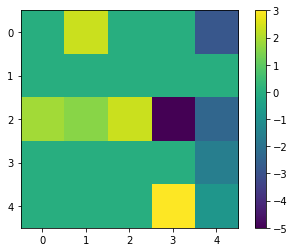

In [191]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
im = ax.imshow(map_angle, interpolation='nearest')
fig.colorbar(im)
plt.show()

In [192]:
ast2StationVect.sort(key=lambda x: x[2])

In [161]:
ang_values = set()
aligned_dict={}
for tup in ast2StationVect:
    dist = map_.station.manhattanDistance(tup[0])
    if tup[2] in ang_values:
        aligned_dict[tup[2]].append((tup[0],dist))
    else:
        
        aligned_dict[tup[2]]=[(tup[0],dist)]         
        ang_values.add(tup[2])

for aligned_list in aligned_dict.values():
    aligned_list.sort(key=lambda x:x[1])
    
aligned_dict

{-5: [(Point(1,8), 2), (Point(0,8), 3)],
 -2.677945044588987: [(Point(0,9), 4)],
 -2.356194490192345: [(Point(1,9), 3), (Point(0,10), 5)],
 -1.892546881191539: [(Point(1,11), 5)],
 -1.7126933813990606: [(Point(1,15), 9)],
 -1.5707963267948966: [(Point(2,9), 2),
  (Point(1,10), 4),
  (Point(2,11), 4),
  (Point(2,12), 5),
  (Point(1,12), 6),
  (Point(2,13), 6),
  (Point(2,14), 7),
  (Point(2,15), 8),
  (Point(0,14), 9),
  (Point(1,16), 10)],
 -1.3258176636680326: [(Point(4,16), 9)],
 -1.2924966677897853: [(Point(4,15), 8)],
 -0.7853981633974483: [(Point(4,10), 3),
  (Point(3,12), 4),
  (Point(3,13), 5),
  (Point(3,14), 6)],
 0.7853981633974483: [(Point(3,2), 6)],
 1.1071487177940904: [(Point(4,4), 5)],
 1.2490457723982544: [(Point(4,2), 7)],
 1.5707963267948966: [(Point(1,6), 4),
  (Point(2,5), 4),
  (Point(2,1), 8),
  (Point(2,0), 9),
  (Point(1,0), 10)],
 1.7126933813990606: [(Point(1,1), 9)],
 1.849095985800008: [(Point(0,1), 10)],
 1.892546881191539: [(Point(1,5), 5)],
 2.35619449019

In [162]:
destroy=map_.satellites_coord[:]
aligned_dict_c  = deepcopy(aligned_dict)
destroy.remove(map_.station)
count=1
while len(destroy)!=0:
    for ang,points in aligned_dict_c.items():
#         if len(points)!=0:
        print(f"{count} Remove angle {ang} {points[0]}")

        destroy.remove(points[0][0])
        points.pop(0)
        count+=1
#         else:
#             continue
    print("Finished tour")
    
    aligned_dict_c={ang:list_ for ang,list_ in aligned_dict_c.items() if len(list_)!=0}

1 Remove angle -5 (Point(1,8), 2)
2 Remove angle -2.677945044588987 (Point(0,9), 4)
3 Remove angle -2.356194490192345 (Point(1,9), 3)
4 Remove angle -1.892546881191539 (Point(1,11), 5)
5 Remove angle -1.7126933813990606 (Point(1,15), 9)
6 Remove angle -1.5707963267948966 (Point(2,9), 2)
7 Remove angle -1.3258176636680326 (Point(4,16), 9)
8 Remove angle -1.2924966677897853 (Point(4,15), 8)
9 Remove angle -0.7853981633974483 (Point(4,10), 3)
10 Remove angle 0.7853981633974483 (Point(3,2), 6)
11 Remove angle 1.1071487177940904 (Point(4,4), 5)
12 Remove angle 1.2490457723982544 (Point(4,2), 7)
13 Remove angle 1.5707963267948966 (Point(1,6), 4)
14 Remove angle 1.7126933813990606 (Point(1,1), 9)
15 Remove angle 1.849095985800008 (Point(0,1), 10)
16 Remove angle 1.892546881191539 (Point(1,5), 5)
17 Remove angle 2.356194490192345 (Point(0,6), 5)
18 Remove angle 2.677945044588987 (Point(0,7), 4)
Finished tour
19 Remove angle -5 (Point(0,8), 3)
20 Remove angle -2.356194490192345 (Point(0,10), 5)